In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import time
from importlib import reload
from IPython.display import clear_output
from shapely.geometry import LineString, Point

sys.path.insert(0, os.path.join('..', 'rl'))
import arnold
import sensor

In [62]:
if [1]: print(1)

1


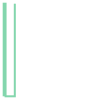

In [63]:
maze = LineString([[-0.1, 0], [-0.1, 5], [0,5], [0,0], [.5,0], [.5,5]])
finish = LineString([[0,5],[.5,5]])
start_heading = [0,.25]
maze

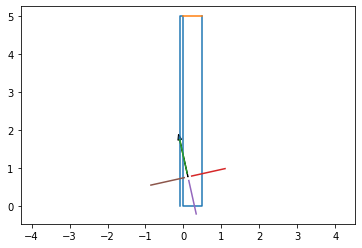

In [56]:
reload(sensor)
sensors = []
min_dist, max_dist = 0.1, 1
sensors.append(sensor.Simple(0, min_dist, max_dist))
sensors.append(sensor.Simple(-np.pi/2, min_dist, max_dist))
sensors.append(sensor.Simple(np.pi, min_dist, max_dist))
sensors.append(sensor.Simple(np.pi/2, min_dist, max_dist))
car = arnold.Arnold()
inp = arnold.ControlInput
inp.heading = np.pi/2
inp.time_step = 1
inp.left_speed = 1
inp.right_speed = 1.5

x = .25
y = .25

for i in range(20):    
    inp.left_speed = np.random.random()
    inp.right_speed = np.random.random()
    dx, dy, deltah = car.step(inp)
    inp.heading += deltah
    x += dx
    y += dy
    for s in sensors:
        s.set_vehicle_pos(x, y, inp.heading)
        print(s.distance(maze))
        
#     print('New position: (' + str(x) + ',' + str(y) + ',' + str(inp.heading) + ')')

    clear_output(wait=True)
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.plot(*maze.xy)
    ax.plot(*finish.xy)
    for s in sensors:
        ax.plot(*s.xy)
    ax.arrow(x, y, np.cos(inp.heading), np.sin(inp.heading), width=.01, head_width=.1)
    plt.show()
    time.sleep(0.1)

(-0.1, 2.1, -0.5, 10.5)

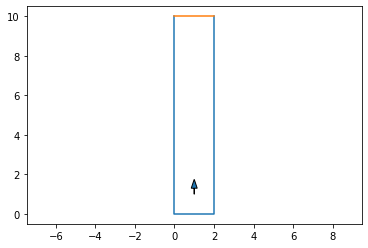

In [31]:
fig, ax = plt.subplots()
ax.plot(*maze.xy)
ax.plot(*finish.xy)
# ax.arrow(*start_point.xy, 0, 1)
ax.arrow(1, 1, 0, 0.3, width=.01, head_width=.3)
ax.axis('equal')

In [4]:
finish.distance(start_point)

9.0